Hello!

My name is Tonatiuh Cruz. I'm pleased to review your project today.

Upon identifying any errors initially, I'll simply highlight them. I encourage you to locate and address the issues independently as part of your preparation for a role as a Data Analyst. In a professional setting, your team lead would follow a similar approach. If you find the task challenging, I'll provide a more specific hint in the next iteration.

You will find my comments below - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

Initialize by loading libraries.

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I recommend load math library. This way you can do some rounding with other methods. 
</div>

### Load data

There are five distinct data sets to work with.

In [2]:
# Load the data files into different DataFrames

calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

### Prepare the data

Before we work with the data, it is important to get a view of each CSV. We will print out the information, and the first few rows to get a feel for the shapes.

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [113]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

When getting the information from the database, do you notice anything strange about the variable type of call_date? 
</div>

In [114]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [115]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

As you could notice when displaying some lines, there are data usage values of zero. It would be interesting to get what is the percentage with respect to the total number of records.   
</div>

In [116]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [117]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [118]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [119]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [120]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [121]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
As you can see, the variable churn_date shows many records as NaN, what is the percentage of these with respect to the total number of records, and what conclusion could you infer from the records that do show a value? 
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

I absolutely agree that you show the database information. But, are you sure that there are no duplicates?
</div>



<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

 Also, I suggest you after viewing the database information, add a paragraph with the summary of the information, some things to highlight are the sample size, if missing values are present and the characteristics of the variables. In addition, it is important to identify whether some variables should change their data type to date. 
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I suggest you generate descriptive statistics for each of the databases to have an overview of the dataset. A function that can help you with this is describe()
</div>

## Plans

In [122]:
# Print the general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [123]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We only have two plans that we offer, so that's fine. Just to make certain we have not had any errors, a quick scan over the plans shows that they are accurate to the offered plans, meaning the data was not entered incorrectly. There is nothing wrong here.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I suggest you place this conclusion at the top when you initially analyze the database.
</div>

### Fix data

There are no issues that require fixing in the 'Plans' data.

### Enrich data

We might wish to add a gb_per_month_included column, since that could make it easier to find our billable internet usage.

In [124]:
# add gb per month

plans['gb_per_month_included'] = plans['mb_per_month_included'] /1000
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.36
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.72


<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

I think it is a very good idea to transform megabytes to gigabytes, but are you sure you have to divide by 1000? 
</div>

## Users

In [125]:
# Print the general/summary information about the users' DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [126]:
# Print a sample of data for users

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The dates are needing formatting but this data at the moment does not have many issues. The city column could probably be separated into city and state if necessary, but that is not in the scope of the questions we wish to answer.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

For this case and the following ones, it is not necessary to take out again the info and the first rows of the database. That analysis has already been done at the top. Also, as I suggested, this conclusion can be placed in the previous points together with the points of the review of the characteristics and elements that I mentioned. 
</div>

### Fix Data

In [6]:
# convert date column to proper format

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good idea to obtain the information to verify that the variable type has been changed. 
</div>

### Enrich Data

It probably could also be a good idea to clean up the churn_date column. There are mostly null values, since most of the users have not cancelled their plans. First, we will make a boolean column that checks if the churn date is nonzero. This column should return 34 True values and 466 False.

In [7]:
# create is_cancelled boolean

users['is_cancelled'] = users['churn_date']
users['is_cancelled'] = users['is_cancelled'].fillna(0).astype('bool')
users['is_cancelled'].value_counts()

False    466
True      34
Name: is_cancelled, dtype: int64

Next, we fill the churn_date column with our filler date, and then convert it to a datetime format.

In [8]:
# fill missing values

users['churn_date'] = users['churn_date'].fillna('1900-01-01')

# convert to datetime format

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       500 non-null    int64         
 1   first_name    500 non-null    object        
 2   last_name     500 non-null    object        
 3   age           500 non-null    int64         
 4   city          500 non-null    object        
 5   reg_date      500 non-null    datetime64[ns]
 6   plan          500 non-null    object        
 7   churn_date    500 non-null    datetime64[ns]
 8   is_cancelled  500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
I recommend you not to fill the variable churn_date with the date 1900-01-01 since we would be telling them to terminate their plans. Although with the variable you created you can already determine who continues with the plan, it is not necessary to add a non-existent date that may affect the calculation of the results.     
</div>

We should also check for duplicates.

In [136]:
# check for duplicate rows

users.duplicated().value_counts()

False    500
dtype: int64

There are no duplicates. But there may be duplicate users with incorrectly assigned IDs, so we should check for that.

In [137]:
# check for duplicates in ID column

users['user_id'].duplicated().value_counts()

False    500
Name: user_id, dtype: int64

Each user has a unique ID.

## Calls

In [138]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [139]:
# Print a sample of data for calls

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Luckily, it appears that our calls data frame is in order, or if it has issues they are not something we are yet aware of. The ID and duration are an integer and a float respectively, so they are in proper format. There are no missing values. There may be duplicates, which we will check for soon.

### Fix data

The call date is not in a date format, however. This might be an issue that is on the other data frames, in which case we could format all the dates together.

In [140]:
# convert to datetime

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


It also would be a good idea to add a columns for the month and year of the calls. We will need to use this to calculate monthly rates.

In [141]:
# add year and month columns

calls['year'] = pd.DatetimeIndex(calls['call_date']).year
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

# check dataframe

calls.describe()

,user_id,duration,year,month
count,137735.000000,137735.000000,137735.0,137735.000000
mean,1247.658046,6.745927,2018.0,9.320797
std,139.416268,5.839241,0.0,2.412550
min,1000.000000,0.000000,2018.0,1.000000
25%,1128.000000,1.290000,2018.0,8.000000
50%,1247.000000,5.980000,2018.0,10.000000
75%,1365.000000,10.690000,2018.0,11.000000
max,1499.000000,37.600000,2018.0,12.000000


We were told that all the data is from 2018, but it's good to double check, anyway.

### Enrich data

Since our time duration is in minutes, and our minutes will always be rounded up, it might be worthwhile to add a column of what could be called "effective minutes" or "billable time" that takes the duration values and rounds them up.

In [142]:
# add minutes rounded up column

calls['billable_time'] = calls['duration'].apply(np.ceil)
calls.head()

,id,user_id,call_date,duration,year,month,billable_time
0,1000_93,1000,2018-12-27,8.52,2018,12,9.0
1,1000_145,1000,2018-12-27,13.66,2018,12,14.0
2,1000_247,1000,2018-12-27,14.48,2018,12,15.0
3,1000_309,1000,2018-12-28,5.76,2018,12,6.0
4,1000_380,1000,2018-12-30,4.22,2018,12,5.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I think the round up of the minutes is a very good idea, but as a practice I recommend that you use another method that uses vectorized operations such as: df['duration'] = np.ceil(df['duration'])
</div>

We will check for duplicates.

In [143]:
# check for duplicates

calls.duplicated().value_counts()

False    137735
dtype: int64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
I recommend that you verify that there are no calls with a duration of zero.
</div>

## Messages

In [144]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [145]:
# Print a sample of data for messages

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


With this, messages is also in order.

### Fix data

Like our prior data, we need to reformat the dates.

In [146]:
# convert to datetime

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


We also need to check the year and month.

In [147]:
# separate into year and month

messages['year'] = pd.DatetimeIndex(messages['message_date']).year
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

# check dataframe

messages.describe()

,user_id,year,month
count,76051.000000,76051.0,76051.000000
mean,1245.972768,2018.0,9.584016
std,139.843635,0.0,2.276392
min,1000.000000,2018.0,1.000000
25%,1123.000000,2018.0,8.000000
50%,1251.000000,2018.0,10.000000
75%,1362.000000,2018.0,12.000000
max,1497.000000,2018.0,12.000000


Again, our data shows it is only over the year of 2018. Just one more set and we can be certain.

### Enrich data

It might seem like an oversight to not include a fourth column that is related to message size (either in characters or in data) but the pricing plan is based on number of messages, so that is not an issue. It isn't like text files can get particularly large, anyway.

We should check for the duplicates.

In [148]:
# check for duplicates

messages.duplicated().value_counts()

False    76051
dtype: int64

There are no duplicates.

## Internet

In [149]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [150]:
# Print a sample of data for the internet traffic

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The look of our internet data frame is the same as our others. We can see here that each data frame seems to be of different lengths, because they are all measured based on user activity, but that is not necessarily a problem. It might seem odd that there are fewer internet sessions than phone calls, as generally it could be assumed that people are more likely to use the internet on a daily basis than they are to have phone calls, but that is not our place to psss judgment.

### Fix data

Convert to datetime.

In [151]:
# convert to datetime

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Check year/month.

In [152]:
# add year and month

internet['year'] = pd.DatetimeIndex(internet['session_date']).year
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

# check data frame

internet.describe()

,user_id,mb_used,year,month
count,104825.000000,104825.000000,104825.0,104825.000000
mean,1242.496361,366.713701,2018.0,9.342552
std,142.053913,277.170542,0.0,2.400404
min,1000.000000,0.000000,2018.0,1.000000
25%,1122.000000,136.080000,2018.0,8.000000
50%,1236.000000,343.980000,2018.0,10.000000
75%,1367.000000,554.610000,2018.0,11.000000
max,1499.000000,1693.470000,2018.0,12.000000


### Enrich data

While we have calculated the billable minutes per month for the phone call data, there is no need to do something similar in the internet usage since the usage is tracked across all sessions rather than per session. We will want to convert to GB eventually, but since that is something that is measured at the end of the month, it is something we should do when we group our data by month.

Instead, we will do our standard check for duplicates.

In [153]:
# check for duplicates

internet.duplicated().value_counts()

False    104825
dtype: int64

With that, we can safely say that the data collection process is working rather well. No missing values, no duplicates, and no values with the wrong year. This means that we can move right along to our next step, where we use these five data frames to make one that we can have all the information we need easily accessible.

## Study plan conditions

To recap the conditions of the plans for each user, we will print out the plan conditions and have them here for reference.

In [154]:
# plan conditions

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.36
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.72


**Surf Plan**

* \$20 per month
* Texts: 50 included, then each subsequent text is \$0.03
* Internet: 15GB (15360MB) included, then each subsequent GB (1024MB) is \$10
* Phone: 500 minutes (8.3 hours) included, then each subsequent minute is \$0.03

**Ultimate Plan**

* \$70 per month
* Texts: 1000 included, then each subsequent text is \$0.01
* Internet: 30GB (30720) included, then each subsequent GB (1024MB) is \$7
* Phone: 3000 minutes (50 hours) included, then each subsequent minute is \$0.03

**All GB and minutes are rounded up. Minutes are rounded up per call, GB is rounded up at the end of the month.**

## Aggregate data per user

Now that the data is clean, we need to arrange it all into a usable record for each pay period. What this means is that we need a data frame that has each user's usage of phone calls, text messages, and internet data for each month. To do this, we will be making one large data frame that contains all of the data and then pruning it into the areas where we are interested.

To aggregate our data per user, we will need to group by their ID and by month. This will be easily accomplished using a pivot table. In order to make the pivot table more agreeable with our data, we also will have to convert it back to a data frame using [.reset_index].

### Aggregate calls

In [155]:
# Calculate the number of calls made by each user per month. Save the result.

calls_per_month = calls.pivot_table(
    index=['user_id', 'month'], 
    values = 'id', 
    aggfunc='count', 
    margins=False).reset_index()
calls_per_month

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


The pivot table will be workable for our data set, but we should also print out some descriptive statistics to get a good idea of what sort of results we have.

In [156]:
# view data

calls_per_month.describe()

,user_id,month,id
count,2258.000000,2258.000000,2258.000000
mean,1247.175819,9.167405,60.998671
std,143.344211,2.495785,31.770869
min,1000.000000,1.000000,1.000000
25%,1122.000000,8.000000,39.000000
50%,1246.000000,10.000000,60.000000
75%,1370.000000,11.000000,80.000000
max,1499.000000,12.000000,205.000000


We see here a bit of an issue, in that there are people who do not make any phone calls could, and probably should, be included in our analysis, but since they do not make any calls, they are not reflected in the data set. The minimum value is 1. As such, it would probably be a better idea to create a new data set, starting with our 'users' data frame, that will aggregate their monthly usage rates.

The 'users' data frame will also serve to be a good place where we can throw all of our data to be cleaned up once it is filled.

In [157]:
# create new users_data data frame

users_data = users.copy(deep = False)

# merge in monthly calls

users_data = users_data.merge(calls_per_month, on= 'user_id', how = 'left')

# original monthly calls data is defined as 'id', change that column to 'calls_per_month'

users_data.rename(columns={'id' : 'calls'}, inplace=True)

# check data frame

users_data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1900-01-01,True,12.0,16.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,8.0,27.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,9.0,49.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,10.0,65.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,11.0,64.0
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,12.0,56.0
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01,True,10.0,11.0
7,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01,True,11.0,55.0
8,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01,True,12.0,47.0
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1900-01-01,True,12.0,149.0


<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
For this case and the following merges consider that in the merge it is useful to use "outer" to identify that some users did not consume in some month.    
</div>

This has provided us a column with the calls in each month, which also has been added to the data frame in the month column. We can use descriptive statistics to see if it changes our values. 

In [158]:
# check data frame

users_data.describe()

,user_id,age,month,calls
count,2277.000000,2277.000000,2258.000000,2258.000000
mean,1246.955204,45.354853,9.167405,60.998671
std,143.248085,16.788738,2.495785,31.770869
min,1000.000000,18.000000,1.000000,1.000000
25%,1122.000000,30.000000,8.000000,39.000000
50%,1246.000000,46.000000,10.000000,60.000000
75%,1370.000000,61.000000,11.000000,80.000000
max,1499.000000,75.000000,12.000000,205.000000


As we see, though we may have merged the data back into our data frame, it has not filled in the values. There are 19 users who have not made phone calls. This should be something we note as we fill out the other columns, that we will have missing values after merging in whenever our count = 0. However, we might want to save filling our null values until after we have finished making this users_data frame, since there could be more unique user_id and month pairings that could require a fill with 0.

#### Aggregate minutes

Next, we can check to do the same for the amount of minutes each user is on the phone per month. The process will be similar, but not quite the same.

Since we are interested in the minutes that are used per month rather than the total time spent, we should sum up the total values in the billable_time column.

In [12]:
# Calculate the amount of minutes spent by each user per month. Save the result.

minutes_per_month = calls.pivot_table(
    index=['user_id', 'month'], 
    values = 'billable_time', 
    aggfunc='sum', 
    margins=False).reset_index()

minutes_per_month

KeyError: 'billable_time'

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
While it is correct to perform the processes to obtain the number of calls and the duration per user and month, I recommend you to put them together in one process as shown below: calls_pivot = calls.pivot_table(index = ['user_id', 'month'], values = 'billable_time', aggfunc = ['sum','count'])
</div>

In [160]:
# view minutes

minutes_per_month.describe()

,user_id,month,billable_time
count,2258.000000,2258.000000,2258.000000
mean,1247.175819,9.167405,435.937555
std,143.344211,2.495785,231.972343
min,1000.000000,1.000000,0.000000
25%,1122.000000,8.000000,275.000000
50%,1246.000000,10.000000,429.000000
75%,1370.000000,11.000000,574.750000
max,1499.000000,12.000000,1510.000000


As we should expect, there are still missing values from this set of data. Since our value is now 'billable_time' instead of 'id', we won't need to rename the column when we merge it into our users_data frame, but we should make sure that we are merging not just on the user ID but also on the month.

In [161]:
# merge in monthly calls

users_data = users_data.merge(minutes_per_month, on= ['user_id', 'month'], how = 'left')
users_data.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1900-01-01,True,12.0,16.0,124.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,8.0,27.0,182.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,9.0,49.0,315.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,10.0,65.0,393.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,11.0,64.0,426.0
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,12.0,56.0,412.0
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01,True,10.0,11.0,59.0
7,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01,True,11.0,55.0,386.0
8,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01,True,12.0,47.0,384.0
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1900-01-01,True,12.0,149.0,1104.0


In [162]:
# check data frame

users_data.describe()

,user_id,age,month,calls,billable_time
count,2277.000000,2277.000000,2258.000000,2258.000000,2258.000000
mean,1246.955204,45.354853,9.167405,60.998671,435.937555
std,143.248085,16.788738,2.495785,31.770869,231.972343
min,1000.000000,18.000000,1.000000,1.000000,0.000000
25%,1122.000000,30.000000,8.000000,39.000000,275.000000
50%,1246.000000,46.000000,10.000000,60.000000,429.000000
75%,1370.000000,61.000000,11.000000,80.000000,574.750000
max,1499.000000,75.000000,12.000000,205.000000,1510.000000


As we should expect, we are missing the same number of values from the month, calls per month and the billable time, since it is suggesting that there are users who haven't made any calls in 2018 (they are using a different phone plan, perhaps). Just to be certain, let's print out all the rows with missing data to confirm that these are all the same users.

In [163]:
# check missing values

users_data[users_data['month'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,1900-01-01,True,NaN,NaN,NaN
381,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,1900-01-01,True,NaN,NaN,NaN
422,1089,Malena,Kelley,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-03,surf,1900-01-01,True,NaN,NaN,NaN
503,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,1900-01-01,True,NaN,NaN,NaN
565,1121,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,surf,1900-01-01,True,NaN,NaN,NaN
606,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,True,NaN,NaN,NaN
611,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-07,surf,1900-01-01,True,NaN,NaN,NaN
635,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,1900-01-01,True,NaN,NaN,NaN
667,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,1900-01-01,True,NaN,NaN,NaN
918,1194,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,1900-01-01,True,NaN,NaN,NaN


We will be able to fill these values out with null values later on, after we have made a data set that is more complete.

Next, we will move onto seeing the amount of text messaging done on a monthly basis.

### Aggregate texts

In [164]:
# Calculate the number of messages sent by each user per month. Save the result.

texts_per_month = messages.pivot_table(
    index=['user_id', 'month'], 
    values = 'id', 
    aggfunc='count', 
    margins=False).reset_index()
texts_per_month

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [165]:
# view data

texts_per_month.describe()

,user_id,month,id
count,1806.000000,1806.000000,1806.000000
mean,1245.091916,9.260797,42.110188
std,139.583315,2.443621,33.122931
min,1000.000000,1.000000,1.000000
25%,1126.250000,8.000000,17.000000
50%,1245.000000,10.000000,34.000000
75%,1362.000000,11.000000,59.000000
max,1497.000000,12.000000,266.000000


In [166]:
# merge in monthly texts

users_data = users_data.merge(texts_per_month, on= ['user_id', 'month'], how = 'left')

# original monthly calls data is defined as 'id', change that column to 'calls_per_month'

users_data.rename(columns={'id' : 'texts'}, inplace=True)

# check data frame

users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time,texts
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1900-01-01,True,12.0,16.0,124.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,8.0,27.0,182.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,9.0,49.0,315.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,10.0,65.0,393.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,11.0,64.0,426.0,36.0


In [167]:
# view data

users_data.describe()

,user_id,age,month,calls,billable_time,texts
count,2277.000000,2277.000000,2258.000000,2258.000000,2258.000000,1773.000000
mean,1246.955204,45.354853,9.167405,60.998671,435.937555,42.095319
std,143.248085,16.788738,2.495785,31.770869,231.972343,33.234773
min,1000.000000,18.000000,1.000000,1.000000,0.000000,1.000000
25%,1122.000000,30.000000,8.000000,39.000000,275.000000,17.000000
50%,1246.000000,46.000000,10.000000,60.000000,429.000000,34.000000
75%,1370.000000,61.000000,11.000000,80.000000,574.750000,59.000000
max,1499.000000,75.000000,12.000000,205.000000,1510.000000,266.000000


There are significantly fewer texts than there are phone calls. Even as recent as 2018, there still are people who simply don't like texting. Interestingly, we can note that there now are more values from the "month" column. The reason is simple: some of the users who had null values in that column

In [168]:
# check missing values

users_data[users_data['month'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time,texts
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,1900-01-01,True,NaN,NaN,NaN,NaN
381,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,1900-01-01,True,NaN,NaN,NaN,NaN
422,1089,Malena,Kelley,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-03,surf,1900-01-01,True,NaN,NaN,NaN,NaN
503,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,1900-01-01,True,NaN,NaN,NaN,NaN
565,1121,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,surf,1900-01-01,True,NaN,NaN,NaN,NaN
606,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,True,NaN,NaN,NaN,NaN
611,1131,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-07,surf,1900-01-01,True,NaN,NaN,NaN,NaN
635,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,1900-01-01,True,NaN,NaN,NaN,NaN
667,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,1900-01-01,True,NaN,NaN,NaN,NaN
918,1194,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,1900-01-01,True,NaN,NaN,NaN,NaN


We see a number of rows here that have been mostly blanked out. They all have missing values in their calls data frame as well. This might be suspicious, because if they don't have any internet useage then that means they aren't using the services at all.

Next, we will be adding data for internet usage per month.

### Aggregate internet

In [169]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_per_month = internet.pivot_table(
    index=['user_id', 'month'], 
    values = 'mb_used', 
    aggfunc='sum', 
    margins=False).reset_index()
internet_per_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [170]:
# view data

internet_per_month.describe()

,user_id,month,mb_used
count,2277.000000,2277.000000,2277.000000
mean,1244.925780,9.177866,16882.197501
std,142.544823,2.497183,7869.784848
min,1000.000000,1.000000,92.310000
25%,1121.000000,8.000000,12347.720000
50%,1243.000000,10.000000,16873.740000
75%,1367.000000,11.000000,21041.520000
max,1499.000000,12.000000,70931.590000


This time, we have more to do than simply fill out our missing values, we also should convert the MB used per month to GB. Since most of our data frame has many GB worth of data being used each month, and since we are always rounding up, it would be easier to make a new column for gb_used rather than both modifying and renaming mb_used.

In [171]:
# merge data into data frame

users_data = users_data.merge(internet_per_month, on= ['user_id', 'month'], how = 'left')
users_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time,texts,mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1900-01-01,True,12.0,16.0,124.0,11.0,1901.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,8.0,27.0,182.0,30.0,6919.15
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,9.0,49.0,315.0,44.0,13314.82
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,10.0,65.0,393.0,53.0,22330.49
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,11.0,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,1900-01-01,True,12.0,39.0,339.0,NaN,23137.69
2273,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1900-01-01,True,9.0,41.0,346.0,NaN,12984.76
2274,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1900-01-01,True,10.0,53.0,385.0,NaN,19492.43
2275,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1900-01-01,True,11.0,45.0,308.0,NaN,16813.83


In [172]:
# convert to gb_used

users_data['gb_used'] = (users_data['mb_used'] / 1000).apply(np.ceil)
users_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time,texts,mb_used,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1900-01-01,True,12.0,16.0,124.0,11.0,1901.47,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,8.0,27.0,182.0,30.0,6919.15,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,9.0,49.0,315.0,44.0,13314.82,14.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,10.0,65.0,393.0,53.0,22330.49,23.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01,True,11.0,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,1900-01-01,True,12.0,39.0,339.0,NaN,23137.69,24.0
2273,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1900-01-01,True,9.0,41.0,346.0,NaN,12984.76,13.0
2274,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1900-01-01,True,10.0,53.0,385.0,NaN,19492.43,20.0
2275,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,1900-01-01,True,11.0,45.0,308.0,NaN,16813.83,17.0


<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Again check if it is correct to divide by 1000 to convert to gigabytes.     
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
For more clarity and better organization I recommend you first make a database of total calls, messages and internet usage by user per month.  And then merge it with the users database to get the user's plan information. 
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Records with NaN must be modified or filled with zero for the following calculations. 
</div>

### Check data frame

With this, we have a full data frame to reference everything that we need. The process of building this data frame, however, has some values that we should clean up. Before we do some cleaning, let's double check to make sure that the data is accurate. User 1001 has been using every service fairly consistently, let's check to make sure the original data sets line up for him.

#### Check a specific user

In [173]:
# check a specific user to ensure data is imported accurately

print("Full Data:\n", users_data[users_data['user_id'] == 1001], '\n\n')
print("Calls per month:\n", calls_per_month[calls_per_month['user_id'] == 1001], '\n\n')
print("Minutes per month:\n", minutes_per_month[minutes_per_month['user_id'] == 1001], '\n\n')
print("Texts per month:\n", texts_per_month[texts_per_month['user_id'] == 1001], '\n\n')
print("Internet per month:\n", internet_per_month[internet_per_month['user_id'] == 1001])

Full Data:
    user_id first_name  last_name  age                             city  \
1     1001     Mickey  Wilkerson   28  Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28  Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28  Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28  Seattle-Tacoma-Bellevue, WA MSA   
5     1001     Mickey  Wilkerson   28  Seattle-Tacoma-Bellevue, WA MSA   

    reg_date  plan churn_date  is_cancelled  month  calls  billable_time  \
1 2018-08-13  surf 1900-01-01          True    8.0   27.0          182.0   
2 2018-08-13  surf 1900-01-01          True    9.0   49.0          315.0   
3 2018-08-13  surf 1900-01-01          True   10.0   65.0          393.0   
4 2018-08-13  surf 1900-01-01          True   11.0   64.0          426.0   
5 2018-08-13  surf 1900-01-01          True   12.0   56.0          412.0   

   texts   mb_used  gb_used  
1   30.0   6919.15      7.0  
2   44.0  13314.82     14.

This does confirm that for active users that the data has been filled in correctly. However, we still have rows that are missing data.

In [174]:
# check rows for missing data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2277 non-null   int64         
 1   first_name     2277 non-null   object        
 2   last_name      2277 non-null   object        
 3   age            2277 non-null   int64         
 4   city           2277 non-null   object        
 5   reg_date       2277 non-null   datetime64[ns]
 6   plan           2277 non-null   object        
 7   churn_date     2277 non-null   datetime64[ns]
 8   is_cancelled   2277 non-null   bool          
 9   month          2258 non-null   float64       
 10  calls          2258 non-null   float64       
 11  billable_time  2258 non-null   float64       
 12  texts          1773 non-null   float64       
 13  mb_used        2243 non-null   float64       
 14  gb_used        2243 non-null   float64       
dtypes: bool(1), datetime6

We can see that there are 19 rows that are missing month values - implying that they have not appeared once in any of these merges. For these rows, since there are so few, we could create a function that scans over the three data sets of 'calls', 'messages', and 'internet' to see if they actually are missing from all three data sets.

#### Check missing calls

In [175]:
# check rows where users have no calls

missing_calls = users_data[users_data['calls'].isna()]['user_id']

for i in missing_calls:
    print('User ID:', i)
    print(calls[calls['user_id'] == i], '\n\n')

User ID: 1025
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1080
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1089
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1108
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1121
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1129
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1131
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1137
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, month, billable_time]
Index: [] 


User ID: 1143
Empty DataFrame
Columns: [id, user_id, call_date, duration, year, 

This loop shows that for all of the rows that had a missing "calls" value, that those users did not make any phone calls. Thus, they can be filled with 0. The minutes per month were linked to the number of calls made, so it goes without saying that they also are filled with 0 values.

In [176]:
# fill missing phone call data

users_data['calls'] = users_data['calls'].fillna(0)
users_data['billable_time'] = users_data['billable_time'].fillna(0)
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2277 non-null   int64         
 1   first_name     2277 non-null   object        
 2   last_name      2277 non-null   object        
 3   age            2277 non-null   int64         
 4   city           2277 non-null   object        
 5   reg_date       2277 non-null   datetime64[ns]
 6   plan           2277 non-null   object        
 7   churn_date     2277 non-null   datetime64[ns]
 8   is_cancelled   2277 non-null   bool          
 9   month          2258 non-null   float64       
 10  calls          2277 non-null   float64       
 11  billable_time  2277 non-null   float64       
 12  texts          1773 non-null   float64       
 13  mb_used        2243 non-null   float64       
 14  gb_used        2243 non-null   float64       
dtypes: bool(1), datetime6

For the values missing from the other data sets, there are certainly too many to scan over, even with a loop. We would need to scan over hundreds of missing text values, both based on the ID and the month. There should be a way to work smarter. Most likely, after all, it simply is that there are users who have a few months where they did not text.

So, instead of looping over the entire data set, it would probably be better to identify some of the IDs on this missing text value and see what it looks like, both in our merged data set and in our 'messages' data set, to see if they line up. If so, we can safely conclude that the function worked properly.

### Check missing texts

In [177]:
# check missing text ids

texts_isna = users_data[users_data['texts'].isna()]['user_id'].value_counts().reset_index()
texts_isna

,index,user_id
0,1042,12
1,1185,12
2,1359,11
3,1498,11
4,1171,11
...,...,...
118,1269,1
119,1131,1
120,1129,1
121,1121,1


Here we see that there are 123 users who did not text for at least 1 month out of the year, and some did not text at all. It would be better to check by finding a user who used the phone for some of the months and making sure that their values match. Ideally, we would want someone who has both null and not null values in the text message setting, but does such a user exist?

In [178]:
# create a data frame of users with text usage

texts_notna = users_data[users_data['texts'].notna()]['user_id'].value_counts().reset_index()
texts_notna

,index,user_id
0,1196,12
1,1214,12
2,1077,12
3,1362,12
4,1099,11
...,...,...
389,1229,1
390,1227,1
391,1221,1
392,1218,1


There are 394 distinct users who have used texting at least one month, and 123 distinct users who have not used texting at least one month. This is over 500, our number of users, so there is are a few users who have used texting some months but not others. These users will help us get a great 

In [179]:
# create data frame for a user with missing and nonmissing text values

pd.merge(texts_notna, texts_isna, how='inner', on='index')

,index,user_id_x,user_id_y
0,1062,9,1
1,1358,8,1
2,1232,7,2
3,1483,7,1
4,1420,5,1
5,1377,5,1
6,1182,5,3
7,1053,5,1
8,1044,4,1
9,1414,4,1


We can see that, for instance, user 1182 has had 5 months where they texted and 3 where they did not. Let's see if this is accurate.

In [180]:
# check original data frame

messages[messages['user_id'] == 1182].sort_values(by = 'month')

,id,user_id,message_date,year,month
29592,1182_2,1182,2018-06-20,2018,6
29595,1182_5,1182,2018-06-01,2018,6
29602,1182_17,1182,2018-06-12,2018,6
29603,1182_18,1182,2018-06-02,2018,6
29596,1182_6,1182,2018-08-16,2018,8
29600,1182_14,1182,2018-08-12,2018,8
29594,1182_4,1182,2018-09-03,2018,9
29597,1182_8,1182,2018-09-19,2018,9
29599,1182_11,1182,2018-09-14,2018,9
29604,1182_19,1182,2018-09-20,2018,9


In [181]:
# check users_data frame

users_data[users_data['user_id'] == 1182].sort_values(by = 'month')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time,texts,mb_used,gb_used
858,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,5.0,4.0,23.0,NaN,129.84,1.0
859,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,6.0,33.0,301.0,4.0,18311.61,19.0
860,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,7.0,37.0,256.0,NaN,21181.50,22.0
861,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,8.0,27.0,203.0,2.0,19038.13,20.0
862,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,9.0,23.0,214.0,4.0,17325.10,18.0
863,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,10.0,22.0,158.0,2.0,20959.70,21.0
864,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,11.0,30.0,229.0,NaN,21903.66,22.0
865,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,1900-01-01,True,12.0,33.0,242.0,2.0,17659.89,18.0


What we see here is that user 1182 had texted in June (6), August (8), September (9), October (10) and December (12). This would remain to follow that the user must have not texted in three months: May (5), July (7) and November (11). As we see in the users_data column, this is accurate. Thus, it is sufficient to conclude that this data frame has been filled accurately.

With this in mind, the first couple of things we will do to clean up this data frame are as follows: fill out the billable columns with 0 values where they are null, and drop any of the rows where month is null. This will give us a full data set of everyone who used the service across 2018.

The rows where month is null are people who have the service, but for one reason or another did not use it to make calls, send texts, or go online throughout the year. If necessary, we could forward this list of users to a different department to investigate the cause.

### Deal with missing values

In [182]:
# fill in na values in calls, billable_time, texts, mb_used and gb_used

cols_to_fill = ['calls', 'billable_time', 'texts', 'mb_used', 'gb_used']

for i in cols_to_fill:
    users_data[i] = users_data[i].fillna(0)

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2277 non-null   int64         
 1   first_name     2277 non-null   object        
 2   last_name      2277 non-null   object        
 3   age            2277 non-null   int64         
 4   city           2277 non-null   object        
 5   reg_date       2277 non-null   datetime64[ns]
 6   plan           2277 non-null   object        
 7   churn_date     2277 non-null   datetime64[ns]
 8   is_cancelled   2277 non-null   bool          
 9   month          2258 non-null   float64       
 10  calls          2277 non-null   float64       
 11  billable_time  2277 non-null   float64       
 12  texts          2277 non-null   float64       
 13  mb_used        2277 non-null   float64       
 14  gb_used        2277 non-null   float64       
dtypes: bool(1), datetime6

In [183]:
# drop empty months

users_data = users_data.dropna()
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2258 non-null   int64         
 1   first_name     2258 non-null   object        
 2   last_name      2258 non-null   object        
 3   age            2258 non-null   int64         
 4   city           2258 non-null   object        
 5   reg_date       2258 non-null   datetime64[ns]
 6   plan           2258 non-null   object        
 7   churn_date     2258 non-null   datetime64[ns]
 8   is_cancelled   2258 non-null   bool          
 9   month          2258 non-null   float64       
 10  calls          2258 non-null   float64       
 11  billable_time  2258 non-null   float64       
 12  texts          2258 non-null   float64       
 13  mb_used        2258 non-null   float64       
 14  gb_used        2258 non-null   float64       
dtypes: bool(1), datetime6

Now we can calculate the revenue from each user that we get each month. The easiest, though decidedly messiest, way to do this will be directly in our native data frame. We can create new columns for the base rate, the billable minutes, texts and internet usage and then add those columns together.

Using np.where will provide us a simple way to check for the plan and apply the respective rates to it.

### Add prices

In [70]:
# insert base rate ($20 for surf plans, $70 for ultimate plans)

users_data['base_rate'] = np.where(users_data['plan'] == 'surf', 20, 70)

C:\Users\Olga\AppData\Local\Temp/ipykernel_17056/963540313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data['base_rate'] = np.where(users_data['plan'] == 'surf', 20, 70)


For the remaining calculations for price, things get more complicated. We need to check each row, the row's plan, and its usage of our services, then account for whether or not the value is above the package limits. This could be done very easily, but doing it right will be rather complicated. So the code is readable, making it simple is generally a good idea.

We also will be able to make it something we could use with different situations. For instance, if we were to focus on a different year, then the package might have a different amount of internet usage included, with a different rate of each GB past the internet rate.

In [11]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [73]:
# make max values for 'surf' plans

surf_phone_max = plans['minutes_included'].loc[0]
surf_text_max = plans['messages_included'].loc[0]
surf_internet_max = plans['gb_per_month_included'].loc[0]

# make rates for 'surf' plans

surf_phone_rate = plans['usd_per_minute'].loc[0]
surf_text_rate = plans['usd_per_message'].loc[0]
surf_internet_rate = plans['usd_per_gb'].loc[0]

# make max values for 'ultimate' plans

ult_phone_max = plans['minutes_included'].loc[1]
ult_text_max = plans['messages_included'].loc[1]
ult_internet_max = plans['gb_per_month_included'].loc[1]

# make rates for 'ultimate' plans

ult_phone_rate = plans['usd_per_minute'].loc[1]
ult_text_rate = plans['usd_per_message'].loc[1]
ult_internet_rate = plans['usd_per_gb'].loc[1]

This code could be turned into a for loop that accounts for the possibility of adding new plans in the future, but this is fine, and unless we add multiple plans in a single year, then this code will be simple enough to expand. We can use it to expand over our users_data to calculate the price using an if, else loop.

We will also initialize the three columns into our data frame for the phone, text, and internet bills. These will be filled with 0, which will make our loop a little less messy since we can ignore the condition for rows where the bill would be 0 (i.e. where the usage is less than what is included in the package).

In [74]:
# set initial prices of 0

users_data['phone_bill'] = 0
users_data['text_bill'] = 0
users_data['internet_bill'] = 0

C:\Users\Olga\AppData\Local\Temp/ipykernel_17056/1162247918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data['phone_bill'] = 0
C:\Users\Olga\AppData\Local\Temp/ipykernel_17056/1162247918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data['text_bill'] = 0
C:\Users\Olga\AppData\Local\Temp/ipykernel_17056/1162247918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [184]:
# fill in prices for phone, text, internet bills

for row, index in users_data.iterrows():
    
    # calculate bills for 'ultimate' plans
    if users_data['plan'].loc[row] == 'ultimate':
        
        # phone
        if users_data['billable_time'].loc[row] > ult_phone_max:
            users_data['phone_bill'].loc[row] = (users_data['billable_time'].loc[row] 
                                                 - ult_phone_max) * ult_phone_rate  
            
        # text
        if users_data['texts'].loc[row] > ult_text_max:
            users_data['text_bill'].loc[row] = (users_data['texts'].loc[row] 
                                                - ult_text_max) * ult_text_rate
            
        # internet
        if users_data['gb_used'].loc[row] > ult_internet_max:
            users_data['internet_bill'].loc[row] = (users_data['gb_used'].loc[row] 
                                                    - ult_internet_max) * ult_internet_rate
    
    # calculate bills for 'surf' plans
    if users_data['plan'].loc[row] == 'surf':
        
        # phone
        if users_data['billable_time'].loc[row] > surf_phone_max:
            users_data['phone_bill'].loc[row] = (users_data['billable_time'].loc[row] 
                                                 - surf_phone_max) * surf_phone_rate
            
        # text
        if users_data['texts'].loc[row] > surf_text_max:
            users_data['text_bill'].loc[row] = (users_data['texts'].loc[row] 
                                                - surf_text_max) * surf_text_rate
            
        # internet
        if users_data['gb_used'].loc[row] > surf_internet_max:
            users_data['internet_bill'].loc[row] = (users_data['gb_used'].loc[row] 
                                                    - surf_internet_max) * surf_internet_rate

users_data.head(10)

KeyError: 'text_bill'

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
While the way you develop the price to pay calculation is correct, I recommend using "elif" instead of a set of if's to make the code more efficient. Also, as a practice, you can create a function that first helps you verify which users should pay for an overage and then what is the rate they should pay for the overage.   
</div>

Because this code was rather complicated, let's take a look at some select rows to see if it worked.

In [185]:
# check to ensure operation worked

users_data[users_data['billable_time'] > 1000].head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_cancelled,month,calls,billable_time,texts,mb_used,gb_used
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1900-01-01,True,12.0,149.0,1104.0,50.0,27044.14,28.0
57,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,1900-01-01,True,12.0,150.0,1114.0,64.0,7792.41,8.0
217,1052,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",2018-03-05,surf,1900-01-01,True,12.0,177.0,1200.0,266.0,26633.75,27.0
248,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,1900-01-01,True,10.0,162.0,1117.0,131.0,28474.23,29.0
249,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,1900-01-01,True,11.0,159.0,1027.0,111.0,35090.02,36.0
250,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,1900-01-01,True,12.0,158.0,1173.0,137.0,24450.06,25.0
590,1126,Jermaine,Mcguire,68,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-02,ultimate,1900-01-01,True,11.0,147.0,1037.0,72.0,20906.16,21.0
659,1141,Kirstie,Hodges,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,1900-01-01,True,10.0,141.0,1069.0,21.0,15702.70,16.0
753,1159,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-07-21,ultimate,1900-01-01,True,12.0,138.0,1071.0,110.0,13966.21,14.0
1017,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,1900-01-01,True,12.0,129.0,1167.0,98.0,34298.28,35.0


This segment shows a few different users with over 1000 minutes on their phone for a given month. User 1003 had a Surf plan, so his 1104 minutes should mean he has a 604 * 0.03 = \\$18.12 phone bill, which is shown to be correct. He has exactly 50 texts, so his text bill should be 0, again correct; and his 27gb is 12gb over the 15gb limit, or at his rate, \\$120.

We can also see user 1057, with an Ultimate plan. Since he has fewer than 3000 minutes, his phone bll should be \\$0, with only 111 texts he should have \\$0 on his text bill, but his 35gb of internet usage is 5 over the package's included rate, so he should pay 7 * 5 = \\$35. All correct again. And in comparison, in the prior month, user 1057 only used 28gb so his internet bill was also \\$0.

It is safe to conclude that the function worked properly. While we only explained two observations, we do not see any odd values in this sample. Now, we should also make a column for the total bill.

In [186]:
# Calculate the monthly revenue for each user

users_data['monthly_charge'] = users_data['base_rate'] + users_data['phone_bill'] + users_data['text_bill'] + users_data['internet_bill']
users_data.head(10)

KeyError: 'base_rate'

### Finalize data frame

We have a number of columns here that are ultimately not relevant for our analysis. We do not need to know the name, age, registration date or cancellation status of our users for any of our project's goals. We can drop those columns. We also can drop the mb_used column, since it has been converted into the more relevant gb_used.

We can drop the columns, but it also could be easier if we made a new data frame out of users_data. We also will move the 'city' column to the last one, since it will make the main data we are interested in fit closer together. We will call this data frame 'user' - similar to our other data frames, but since this is most likely the final state of the data frame that we will be working with, giving it the shortest, simplest name will make performing operations with it faster.

In [187]:
# drop columns

user = pd.DataFrame(users_data, columns = ['user_id', 'plan', 'month', 'monthly_charge', 'calls', 'billable_time', 
                                           'phone_bill', 'texts', 'text_bill', 'gb_used', 'internet_bill', 'city'])
user.head()

,user_id,plan,month,monthly_charge,calls,billable_time,phone_bill,texts,text_bill,gb_used,internet_bill,city
0,1000,ultimate,12.0,NaN,16.0,124.0,NaN,11.0,NaN,2.0,NaN,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,8.0,NaN,27.0,182.0,NaN,30.0,NaN,7.0,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,surf,9.0,NaN,49.0,315.0,NaN,44.0,NaN,14.0,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,surf,10.0,NaN,65.0,393.0,NaN,53.0,NaN,23.0,NaN,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,surf,11.0,NaN,64.0,426.0,NaN,36.0,NaN,19.0,NaN,"Seattle-Tacoma-Bellevue, WA MSA"


<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

I recommend you not to eliminate all the variables because they can be useful for further analysis. For example, in the table you show it is strange that in "monthly_charge" we have NaN values when you have to pay at least for the plan, then this could make sense if those users canceled the plan but you no longer have that variable. Also, the user characteristics variables can help you to disaggregate the results by those characteristics. 
</div>

As we will be measuring across two different categories of users, it may also be useful to create two separate data frames based on what the user's specific plans are.

In [188]:
surf_users = user[user['plan'] == 'surf']
ult_users = user[user['plan'] == 'ultimate']

## Study user behaviour

To help get a view of what we can expect from our analysis, we can try and link some of this data by factors that may effect it. For instance, the average duration of calls compared to the number of calls made.

More relevant, however, would be finding metrics that help us determine if there are patterns to the average amount of calls, texts, and internet usage based on the specific month (do people use the internet more in cold winter months than warm summer months?) or, based on the specific plan that they have (do people actually go out of their way to be mindful of their plan's monthly service?)

### Calls

We will use a bar plot to visualize duration of calls, for each plan. Storing these values in new data frames will make them simpler to plot.

#### Bar charts

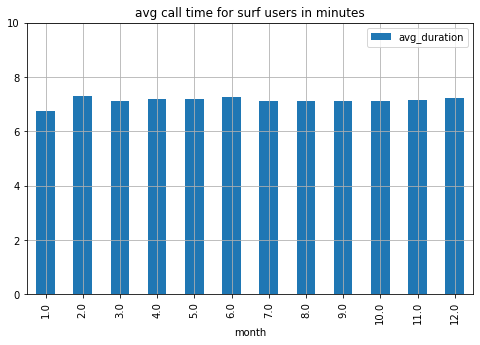

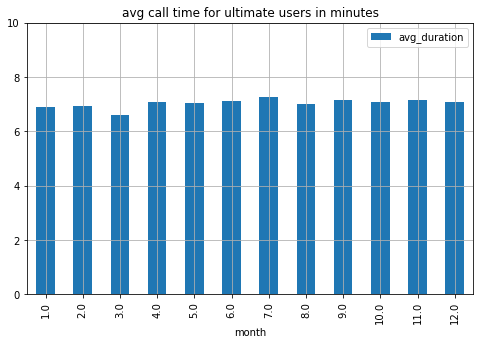

In [189]:
# average duration of calls per each plan per each distinct month.

# calculate the average duration of calls

pt_surf_time = surf_users.pivot_table(index = 'month', values = ['calls', 'billable_time'], aggfunc = 'sum')
pt_surf_time['avg_duration'] = pt_surf_time['billable_time'] / pt_surf_time['calls']

pt_ult_time = ult_users.pivot_table(index = 'month', values = ['calls', 'billable_time'], aggfunc = 'sum')
pt_ult_time['avg_duration'] = pt_ult_time['billable_time'] / pt_ult_time['calls']

pt_surf_time.plot(y = 'avg_duration', kind = 'bar', title = 'avg call time for surf users in minutes', 
                  ylim = (0,10), grid = True, figsize = (8,5));
pt_ult_time.plot(y = 'avg_duration', kind = 'bar', title = 'avg call time for ultimate users in minutes', 
                 ylim = (0,10), grid = True, figsize = (8,5));

Here we see that regardless of the month, or the plan, the average length of a given phone call is around 7 minutes long. The length of calls are uniformly distributed, but what about the number of calls? We will check the total number of calls and call time per month, next.

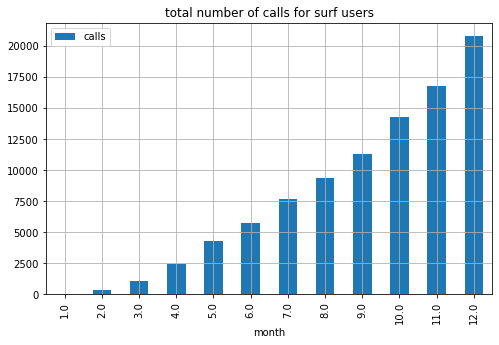

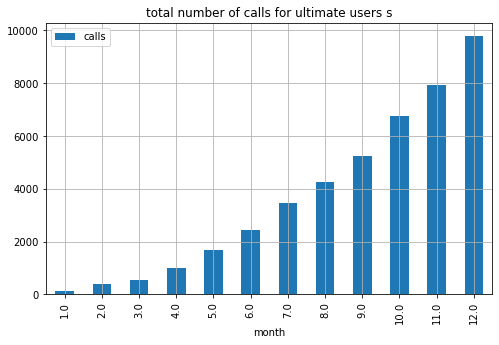

In [190]:
# total number of calls

pt_surf_time.plot(y = 'calls', kind = 'bar', title = 'total number of calls for surf users', 
                   grid = True, figsize = (8,5));
pt_ult_time.plot(y = 'calls', kind = 'bar', title = 'total number of calls for ultimate users s', 
                  grid = True, figsize = (8,5));

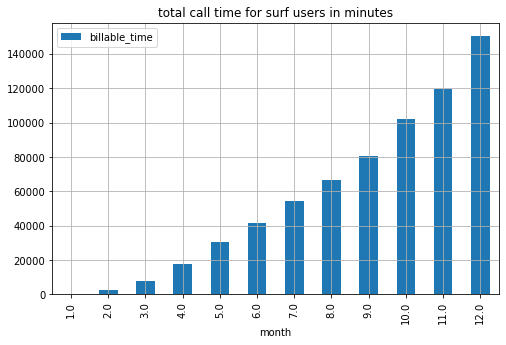

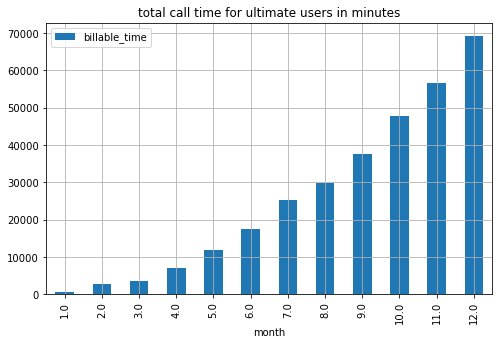

In [191]:
# total call time per month

pt_surf_time.plot(y = 'billable_time', kind = 'bar', title = 'total call time for surf users in minutes', 
                   grid = True, figsize = (8,5));
pt_ult_time.plot(y = 'billable_time', kind = 'bar', title = 'total call time for ultimate users in minutes', 
                  grid = True, figsize = (8,5));

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
For these graphs I recommend having both types of plans on the same graph for easier comparison. 
</div>

We get many users who were signing up to the service in 2018 in our data set, so it makes sense that we see a steady increase in the total call time. It would appear, since the data shows a smooth curve upwards, that the only reason for this increase is because of a higher number of users. We should make a quick plot to see the number of users we got throughout the year. If it is also a smooth curve upwards like this one, we can conclude that to be the case.

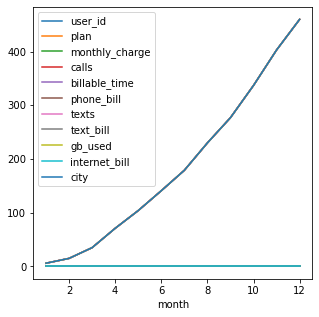

In [192]:
user.groupby('month').count().plot(figsize=(5,5));

With that in mind, we can hypothesize that the average call duration is most likely not connected to the month or the type of subscription. It could still be the case, but it likely is not.

#### Histograms

We will now make a histogram showing how many minutes a user generally will require each month.

Both plans:


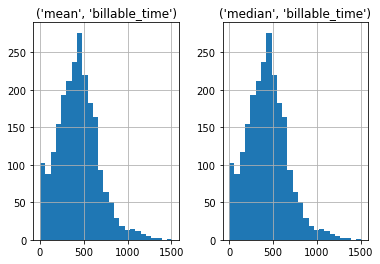

In [193]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

pt_time = user.pivot_table(
    index=['user_id', 'month'], values='billable_time', aggfunc=['mean', 'median']
)
print('Both plans:')
pt_time.hist(bins = 25);

Surf users:


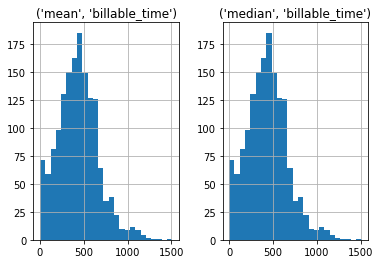

Ultimate users:


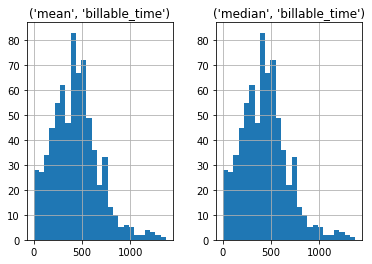

In [194]:
pt_surf_time = user[user['plan'] == 'surf'].pivot_table(
    index=['user_id', 'month'], values='billable_time', aggfunc=['mean', 'median']
)

pt_ult_time = user[user['plan'] == 'ultimate'].pivot_table(
    index=['user_id', 'month'], values='billable_time', aggfunc=['mean', 'median']
)
print('Surf users:')
pt_surf_time.hist(bins = 25);
plt.show()
print('Ultimate users:')
pt_ult_time.hist(bins=25);

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
For these graphs I recommend having both types of plans on the same graph for easier comparison. 
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Based on the graphs made, what type of distribution is it? 
</div>

Since the mean and median both have their peaks a little before 500 minutes of billable time, it thus means that a little over half of the users will not use more than 500 minutes on a monthly basis. That also means that almost half of them will use more than 500 minutes.

It does appear that there are more Surf users who use fewer than 500 minutes, however, and a few more Ultimate users who use more than 500. There also are far fewer Ultimate users who don't use any of their minutes.

Regardless, there are no instances of an Ultimate user passing the threshold for their 3000 monthly minutes (and we should hope not - that would average out to around an hour and a half of phone time every single day). However, it also means that in no instance do we make more money from our Ultimate users based on phone usage alone. There are a few users who are extremely high in their phone usage, where they will be spending an extra \\$15-30 per month on their phone, but unless they also are going over their text messages (or more likely, their internet) having them on the Ultimate plan is still better for our profits.

#### Descriptive statistics

We will use a check of averages (mean and median) as well as the variance to check if the behavior is different based on the type of account.

In [195]:
# Calculate the mean and the variance of the monthly call duration

print('Surf Users:\n', pt_surf_time.describe(), 
      '\nVariance:', np.var(user[user['plan'] == 'surf']['billable_time']), '\n')
print('Ultimate Users:\n', pt_ult_time.describe(), 
      '\nVariance:', np.var(user[user['plan'] == 'ultimate']['billable_time']),'\n')
print('All Users:\n', user['billable_time'].describe(),
     '\nVariance:', np.var(user['billable_time']))

Surf Users:
                mean        median
      billable_time billable_time
count   1545.000000   1545.000000
mean     436.519741    436.519741
std      229.283805    229.283805
min        0.000000      0.000000
25%      279.000000    279.000000
50%      430.000000    430.000000
75%      579.000000    579.000000
max     1510.000000   1510.000000 
Variance: 52537.036665305 

Ultimate Users:
                mean        median
      billable_time billable_time
count    713.000000    713.000000
mean     434.676017    434.676017
std      237.852123    237.852123
min        0.000000      0.000000
25%      263.000000    263.000000
50%      425.000000    425.000000
75%      566.000000    566.000000
max     1369.000000   1369.000000 
Variance: 56494.2863392536 

All Users:
 count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: billable_time, dtype: float64 
Variance: 5378

Based on these descriptive statistics, the mean, standard deviation, median, and maximum are all fairly similar across both sets of users. The standard deviation (and, as a result, the variance) is slightly higher for the Ultimate users. This could simply be because we have fewer Ultimate users, but with over 700 data points we have plenty to work with. There is an extremely large variance across all users, which tells us that there are many users who have immense amount of time on their phones and others who have a very low amount of time.

The variance is also higher for Ultimate users. What this tells us is that the data is more spread out over the Ultimate users. There are more extreme values - that is to say, more users with low and high minutes used per month. This could be random, but it also indicates the possibility that, put simply, Ultimate users more commonly use their phones more. It seems to agree with our analysis so far.

This would certainly not be illogical. Someone who knows they spent a vast amount of time on the phone probably would be more likely to sign up for the Ultimate plan. Is this accurate, however? The quartiles may not necessarily support it. It is something we should save for more robust analysis. We can, however, make some more box plots to get a better view of our outliers.

#### Box plot

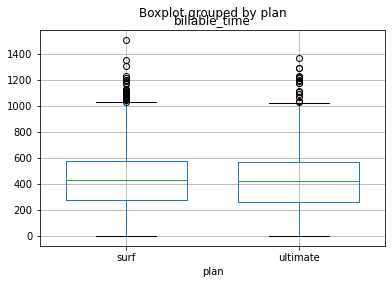

In [225]:
# Plot a boxplot to visualize the distribution of the monthly call duration

user.boxplot(column = 'billable_time', by = 'plan',  widths = 0.7);

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good practice to make use of a box plot to identify other hallzagos. 
</div>

The box plots show an interesting result that goes against some of our analysis. They seem to suggest that there is not a significant difference in the minutes used between the plans. If anything, Surf users seem more likely to go past 500 minutes - they have more outliers, and a higher third quartile. For our bar charts, histograms, and numerical analysis it seemed like the Ultimate users have more tendency to extreme values.

However, it must be reiterated that those could simply be a result of more data points. Because Surf users have more observations, they will both have and be less impacted by the high values and outliers. Most likely, the amount of time a user spends on the phone is not a deciding factor in their choice of plan, and at a rate of \\$0.03 per minute, it most likely will not be where we make or break our profits as less than a quarter of our values will even make us more than \\$3 from their used minutes.

Next, we will perform similar analysis on the number of text messages per month.

### Messages

#### Bar charts

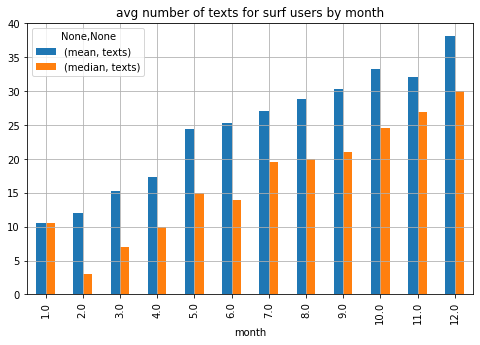

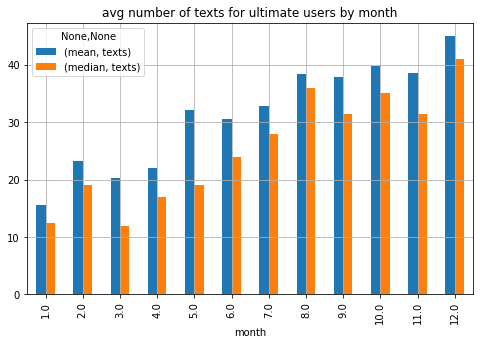

In [197]:
# bar charts of average texts per month

pt_surf_text = surf_users.pivot_table(index = 'month', values = 'texts', aggfunc = ['mean', 'median'])

pt_ult_text = ult_users.pivot_table(index = 'month', values = 'texts', aggfunc = ['mean', 'median'])

pt_surf_text.plot(kind = 'bar', title = 'avg number of texts for surf users by month', grid = True, figsize = (8,5));
pt_ult_text.plot(kind = 'bar', title = 'avg number of texts for ultimate users by month', grid = True, figsize = (8,5));

These bar charts show some interesting results. We can see that the mean number of texts do seem to not change as significantly  between plans as the median number of texts. The results are not uniformly distributed, but are increasing in a roughly linear fashion.

#### Descriptive Statistics

The amount appears to be mostly tied to the number of users, but there does seem to be more Ultimate users sending more texts. Let's take a look at the numbers.

In [198]:
# descriptive statistics

print('Surf Users:')
print('Variance:', np.var(user[user['plan'] == 'surf']['texts']))
user[user['plan'] == 'surf'].groupby('month')['texts'].describe()

Surf Users:
Variance: 1131.216726259677


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1.0,2.0,10.500000,14.849242,0.0,5.25,10.5,15.75,21.0
2.0,9.0,12.000000,19.646883,0.0,0.00,3.0,11.00,58.0
3.0,23.0,15.260870,18.616262,0.0,0.00,7.0,25.00,59.0
4.0,50.0,17.400000,22.396246,0.0,0.00,10.0,27.75,120.0
5.0,75.0,24.386667,29.375433,0.0,0.00,15.0,37.50,149.0
6.0,96.0,25.281250,30.405922,0.0,0.75,14.0,36.50,133.0
7.0,120.0,27.025000,30.523297,0.0,0.75,19.5,41.25,164.0
8.0,159.0,28.855346,32.352457,0.0,2.00,20.0,43.00,156.0
9.0,191.0,30.376963,31.667421,0.0,4.00,21.0,47.50,153.0


In [199]:
print('Ultimate Users:')
print('Variance:', np.var(user[user['plan'] == 'ultimate']['texts']))
user[user['plan'] == 'ultimate'].groupby('month')['texts'].describe()

Ultimate Users:
Variance: 1208.4461719735089


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1.0,4.0,15.500000,17.710637,0.0,1.50,12.5,26.50,37.0
2.0,6.0,23.166667,23.506737,0.0,9.75,19.0,25.25,67.0
3.0,12.0,20.250000,25.580977,0.0,0.00,12.0,28.00,72.0
4.0,21.0,22.047619,23.326972,0.0,5.00,17.0,28.00,77.0
5.0,29.0,32.103448,36.018195,0.0,0.00,19.0,60.00,149.0
6.0,45.0,30.533333,29.361849,0.0,8.00,24.0,49.00,143.0
7.0,59.0,32.830508,30.991741,0.0,4.50,28.0,52.50,149.0
8.0,71.0,38.478873,34.588544,0.0,6.00,36.0,64.50,151.0
9.0,86.0,37.895349,32.417871,0.0,7.25,31.5,61.00,155.0


In [200]:
print('All Users:')
print('Variance:', np.var(user['texts']))
user.groupby('month')['texts'].describe()

All Users:
Variance: 1165.6742763256455


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1.0,6.0,13.833333,15.458547,0.0,0.5,11.5,22.5,37.0
2.0,15.0,16.466667,21.212754,0.0,0.0,8.0,24.5,67.0
3.0,35.0,16.971429,21.017480,0.0,0.0,9.0,27.0,72.0
4.0,71.0,18.774648,22.608593,0.0,0.0,11.0,28.0,120.0
5.0,104.0,26.538462,31.380200,0.0,0.0,15.5,39.5,149.0
6.0,141.0,26.957447,30.072264,0.0,2.0,19.0,42.0,143.0
7.0,179.0,28.938547,30.713457,0.0,1.5,23.0,46.0,164.0
8.0,230.0,31.826087,33.282373,0.0,2.5,22.5,50.0,156.0
9.0,277.0,32.711191,32.033548,0.0,4.0,26.0,50.0,155.0


As we might have expected, the mean and median are both higher for the Ultimate users. This is the case even though the people who text the most are Surf users - though it makes sense, the Ultimate users have a smaller pool, so their outliers will raise their Mean higher, and they already have a higher Median.

The variance gives us a clear indication of just what is going on, which we can confirm by looking at the quartiles. People text in very different ways. In all of the data sets, the first quartile contains many observations with low text counts, often under 5 texts. So a quarter of our observations have under 5 texts. On the other hand, a quarter have high amount of texts, usually over 25. With maximums in the triple digits, that makes sense for us to have high variance.

Most likely, the texting part of the plan does not hold any importance when it comes to making our revenue (notwithstanding that offering the texting plan would bring in more users). The average user, going through both Mean and Median, for both plans remains below the Surf limit of 50 texts a month.

Comparing both to the full data, the slight difference seems to perhaps be something that could have occurred through random chance. It's possible that Ultimate users are more text-happy, since they do text more on average, but it probably isn't a significant difference. We will analyze this later, to determine if that is the case.

#### Box plot

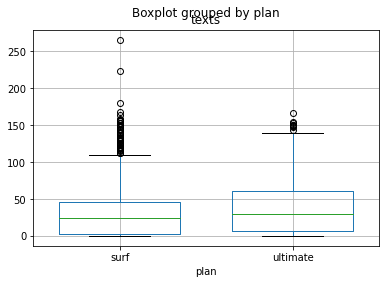

In [224]:
# box plot

user.boxplot(column = 'texts', by = 'plan',  widths = 0.7);

These box plots show a rather clear indication that Ultimate users tend to text more than Surf users. The median is higher but also the box above the median is larger for Ultimate users, meaning there are more users who go into those higher fields. Most of the data points for our Surf users are also below the whiskers for the Ultimate users, and there appear to be only 3 users whose monthly texts pass the highest Ultimate user. The rates are, however, still incredibly similar.

Similar to the phone plan, not a single user engaging in the Ultimate plan came close to hitting the text limit. At the absolute highest, the company charged \\$6.48 for the Surf user who made 266 texts in a single month.

With this in mind, we can say that most likely if there is any point that will provide a significant difference between our plans based on user activity, it will be on the internet traffic. On average, users won't pass their monthly minutes or their number of texts for the Surf plan, and if they do, they still are not likely to spend enough to make upgrading to the Ultimate plan worth it for them.

However, the internet plan is a very big deal. The data limits are both fairly low. With a little bit of video streaming, music, downloads, etc., reaching 15 or even 30GB is very easy, and the cost per GB after that is fairly significant for both plans. We should be very attentive to the analysis we do for the internet section of our plans.

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

For this case, as with the calls, I recommend using histograms with both plans to see the frequency of each number of messages used. In this case, what is the type of distribution identified?
</div>

### Internet

First things first, we should make similar bar charts to get an overview of the data usage.

#### Bar charts

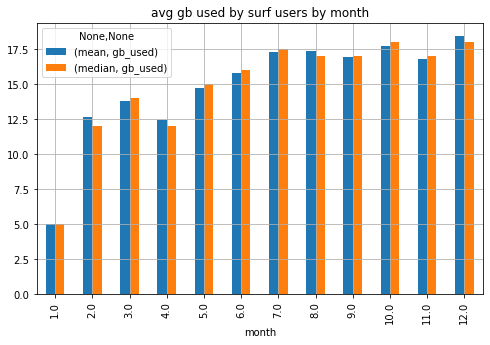

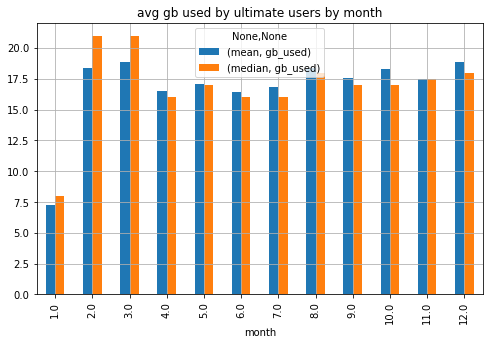

In [202]:
# average gb used per month bar charts

pt_surf_net = surf_users.pivot_table(index = 'month', values = 'gb_used', aggfunc = ['mean', 'median'])

pt_ult_net = ult_users.pivot_table(index = 'month', values = 'gb_used', aggfunc = ['mean', 'median'])

pt_surf_net.plot(kind = 'bar', title = 'avg gb used by surf users by month', grid = True, figsize = (8,5));
pt_ult_net.plot(kind = 'bar', title = 'avg gb used by ultimate users by month', grid = True, figsize = (8,5));



Here, we see something that does show a fairly clear indication that there is a difference in the internet usage based on the type of plan a user has. The absolute highest it gets for a Surf user - around 17.5GB on average, is a rate that Ultimate users tended to reach, often surpassing that data usage. This makes sense, as the Surf user will need to spend \\$10 extra if they pass 15GB. While they might not pay attention to their phone usage or text useage since the price is far more negligible.

#### Descriptive statistics

We will take a closer look at the descriptive statistics.

In [203]:
# descriptive statistics

print('Surf Users:\n', user[user['plan'] == 'surf'].groupby('month')['gb_used'].describe(),
     '\nVariance:', np.var(user[user['plan'] == 'surf']['gb_used']))

print('Ultimate Users:\n', user[user['plan'] == 'ultimate'].groupby('month')['gb_used'].describe(),
     '\nVariance:', np.var(user[user['plan'] == 'ultimate']['gb_used']))

print('All Users:\n', user.groupby('month')['gb_used'].describe(),
     '\nVariance:', np.var(user['gb_used']))

Surf Users:
        count       mean       std  min    25%   50%   75%   max
month                                                          
1.0      2.0   5.000000  4.242641  2.0   3.50   5.0   6.5   8.0
2.0      9.0  12.666667  6.652067  1.0   8.00  12.0  17.0  21.0
3.0     23.0  13.782609  8.218364  2.0   6.50  14.0  19.0  31.0
4.0     50.0  12.420000  7.688024  0.0   6.25  12.0  18.5  29.0
5.0     75.0  14.720000  7.776541  0.0   8.00  15.0  21.0  37.0
6.0     96.0  15.770833  7.058372  0.0  13.00  16.0  19.0  38.0
7.0    120.0  17.300000  8.083181  0.0  13.00  17.5  22.0  39.0
8.0    159.0  17.327044  8.673761  0.0  12.00  17.0  22.0  52.0
9.0    191.0  16.921466  7.028447  0.0  13.00  17.0  21.0  36.0
10.0   232.0  17.693966  7.857296  0.0  13.00  18.0  22.0  47.0
11.0   277.0  16.787004  7.319428  0.0  13.00  17.0  21.0  41.0
12.0   311.0  18.459807  8.044483  0.0  14.00  18.0  22.0  71.0 
Variance: 61.62690126831501
Ultimate Users:
        count       mean        std  min    25

The mean and median both rise as we see more observations. This could indicate a few things. It could be as simple as assuming that there generally are few people who don't use the internet as much - given the data is from 2018, this makes sense. It also would go to follow that it suggests that there are an infrequent amount of users who have high internet useage.

It appears that the real average is somewhere around 16-18gb per month. The variances are all incredibly similar, which suggests that all three groups have a similar spread around the average. We can expect a fairly consistent internet useage.

Next, something that seems odd is that steady increase. Is it likely to be simply due to having more users sign up throughout the year, or is it perhaps more impacted by certain outliers? If we plot another bar chart of the total data usage by month, this might clue us into the answer. If we see a significant jump or something else strange, that would suggest that it might be related to outlier activity.

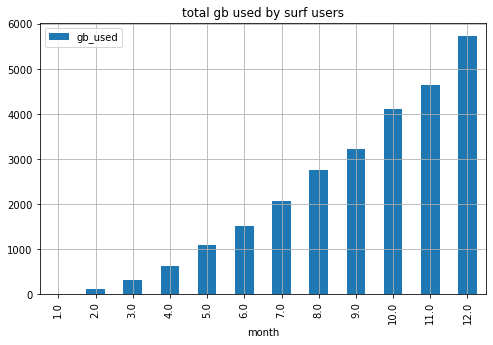

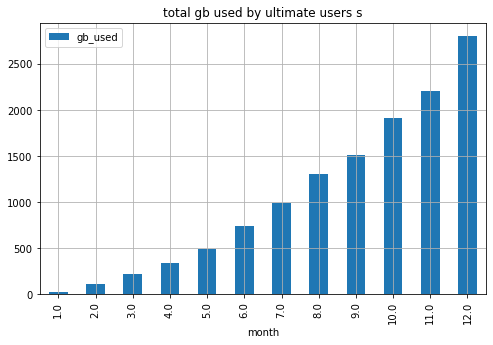

In [204]:
# plot total gb used

surf_users.pivot_table(
    index = 'month', values = 'gb_used', aggfunc = 'sum').plot(
    y = 'gb_used', kind = 'bar', title = 'total gb used by surf users', grid = True, figsize = (8,5));
ult_users.pivot_table(
    index = 'month', values = 'gb_used', aggfunc = 'sum').plot(
    y = 'gb_used', kind = 'bar', title = 'total gb used by ultimate users s', grid = True, figsize = (8,5));

These bar charts show quadratic growth, which is in line with the total growth of the users. There is a fairly large jump between September and October, which might be useful to note, but it does not appear that outliers are significantly impacting the data useage.

#### Histograms

We can take a quick look at some histograms to get a view of the data by user.

Both plans:


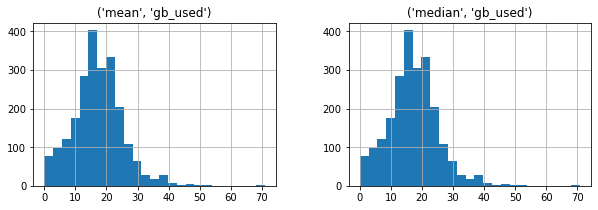

In [205]:
# histograms

pt_net = user.pivot_table(
    index=['user_id', 'month'], values='gb_used', aggfunc=['mean', 'median']
)
print('Both plans:')
pt_net.hist(bins = 25, figsize = (10,3));

Surf users:


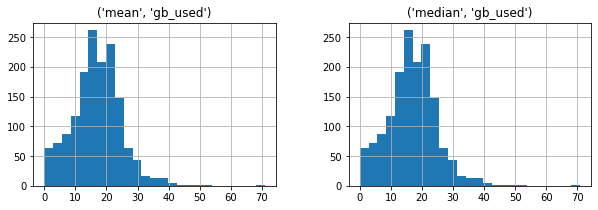

Ultimate users:


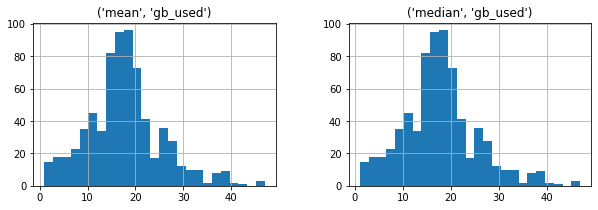

In [206]:
pt_surf_net = user[user['plan'] == 'surf'].pivot_table(
    index=['user_id', 'month'], values='gb_used', aggfunc=['mean', 'median']
)

pt_ult_net = user[user['plan'] == 'ultimate'].pivot_table(
    index=['user_id', 'month'], values='gb_used', aggfunc=['mean', 'median']
)

print('Surf users:')
pt_surf_net.hist(bins = 25, figsize = (10,3));
plt.show()
print('Ultimate users:')
pt_ult_net.hist(bins=25, figsize = (10,3));

These histograms show a normal distribution with median peaks that appear to be higher than the mean peaks for both sets of users. The shape of the histograms, however, seem to suggest that there is not a significant difference in the average of the internet useage between users.

Since the average is below 20 gb, it also tells us that we might not expect to make more money off Surf users. We will get some surf users who have extremely high rates of data use, but to grant us a better profit than an Ultimate user, they need to reach 20gb. There also are some Ultimate users who reach their data limits, but they are near the edge of their normal distribution.

#### Box plot

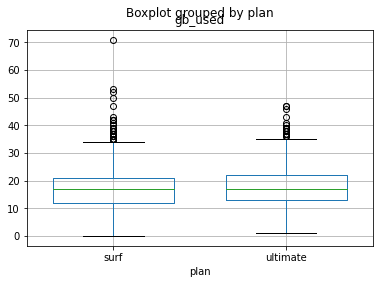

In [223]:
# box plot

user.boxplot(column = 'gb_used', by = 'plan', widths = 0.7);

These box plots show a very strong reason to believe that there is no significant difference in the internet traffic between people's data plans. The boxes are approximately the same size, their whiskers as well, and even their outliers are rather similar in number and range. The 'Surf' box is slightly larger on the lower half, which suggests that there are a few more people in that area who have a lower internet useage - which makes sense, as we should expect to see more Surf users with under 15gb.

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

What is the type of distribution identified?
</div>

## Revenue

Now, we will analyze the difference in our revenue based on the plans. Most likely, we will observe that on average we see better revenue on the Ultimate plan, but that the most profitable users will be through the Surf plan.

Before that, however, we will create some box plots to get a view of just how significant (or insignificant) each type of service is in terms of revenue.

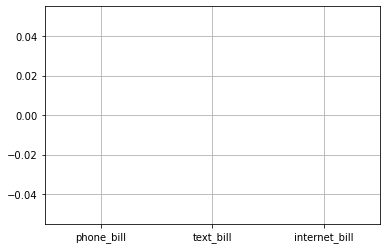

In [221]:
user.boxplot(column = ['phone_bill', 'text_bill', 'internet_bill'], widths = 0.7);

This box plot is relevant because it shows us that even having to spend money from going over the limit on phone or text usage is so uncommon it is an outlier, whereas internet bill outliers are only rates where they surpass \\$100. This is something that could have been picked up by analyzing the user behavior, but it's good to have it visualized here. If we want to focus on revenue, it would be generally better to not think so much about phone or text. The internet usage being more or less indentical across plans is much more useful for statistics.

Anyway, with that in mind, we can move onto analysis of our total revenue.

#### Bar charts

In [209]:
# average revenue bar charts

pt_surf_rev = surf_users.pivot_table(index = 'month', values = 'monthly_charge', aggfunc = ['mean', 'median'])

pt_ult_rev = ult_users.pivot_table(index = 'month', values = 'monthly_charge', aggfunc = ['mean', 'median'])

pt_surf_rev.plot(kind = 'bar', title = 'avg revenue for surf users by month', grid = True, figsize = (8,5));
pt_ult_rev.plot(kind = 'bar', title = 'avg revenue for ultimate users by month', grid = True, figsize = (8,5));

TypeError: no numeric data to plot

Based on these initial bar charts, we see something that is fairly expected. The revenue for Surf users fluctuates quite a bit, whereas the revenue for Ultimate users is rather consistent. That makes sense, considering in most cases the Ultimate users do not pass their limitations  On average, it appears that the Ultimate plan is more profitable, but there are very high outliers in the Surf users.

Will these high-cost Surf users be a significant source of revenue, though? The averages could be weighted by a few extreme outliers.

#### Descriptive statistics

In [210]:
# descriptive statistics

print('Surf Users:\n', user[user['plan'] == 'surf'].groupby('month')['monthly_charge'].describe(),
     '\nVariance:', np.var(user[user['plan'] == 'surf']['monthly_charge']))

print('Ultimate Users:\n', user[user['plan'] == 'ultimate'].groupby('month')['monthly_charge'].describe(),
     '\nVariance:', np.var(user[user['plan'] == 'ultimate']['monthly_charge']))

print('All Users:\n', user.groupby('month')['monthly_charge'].describe(),
     '\nVariance:', np.var(user['monthly_charge']))

Surf Users:
        count  mean  std  min  25%  50%  75%  max
month                                           
1.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
2.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
3.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
4.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
5.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
6.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
7.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
8.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
9.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
10.0     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
11.0     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
12.0     0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN 
Variance: nan
Ultimate Users:
        count  mean  std  min  25%  50%  75%  max
month                                           
1.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
2.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
3.0      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
4.0      0.0   NaN  NaN 

The variance of the Surf users is extremely high, and their averages as the months go on show a shocking result. They have so many high-cost users that by December their mean price is \\$69.18, which is almost the same as the Ultimate plan's cost. Their median seems to stabilize at around \\$40-50, but their third quartile steadily increases. This is likely because we know that the Surf users have approximately the same rates of internet usage as Ultimate users. They only need to use 5GB past their 15GB limit to reach a \\$70 bill, after all.

In comparison, the Ultimate users have quite a few high cost plans, often having averages that are higher than their \\$70 baseline, but in all months but March (12 observations, statistically irrelevant) they have their third quartile still at \\$70. Their mean values in all the months are still only a fraction of a standard deviation away from \\$70. They do have some users who are quite large price outliers, but their maximum values are nowhere near as expensive as the maximum prices of the Surf users, who usually are at least \\$100 larger.

Since we have more Surf users in general, it is entirely possible that the Surf plan is more profitable for us. It cannot be said definitively, however. Since the average Surf user's plan is less expensive than the average Ultimate user, those extreme values might not be statistically significant.

Is there a difference in the total revenue by month?

#### Plot revenue by month

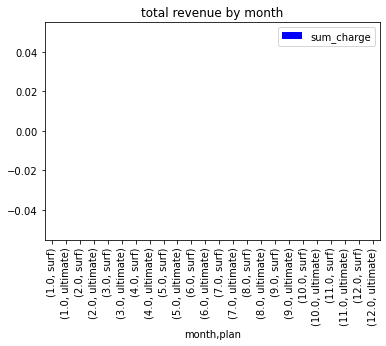

In [219]:
# plot all data

pt_user_charge = user.pivot_table(index = ['month', 'plan'], values = 'monthly_charge', aggfunc = ['sum', 'count'])
pt_user_charge.columns = ['sum_charge', 'user_count']

pt_user_charge.plot(
    y = 'sum_charge', color = ('blue', 'lime'), kind = 'bar', 
    title = 'total revenue by month');

Across all of our months we do see that our Surf users provide much larger revenue than our Ultimate users. However, we also should keep in mind that we have significantly more Surf users overall. It is possible that we could get higher returns if we convinced them to upgrade. 

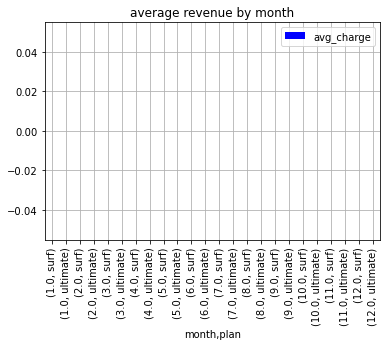

In [218]:
# plot average revenue

pt_user_charge['avg_charge'] = pt_user_charge['sum_charge'] / pt_user_charge['user_count']
pt_user_charge.plot(
    y = 'avg_charge', color = ('blue', 'lime'), kind = 'bar', 
    title = 'average revenue by month', grid = True);

The average revenue shows us a clear pattern, that aligns with what we can see above. More Surf users means that the average revenue will increase for them. They have a large enough variance in their internet usage that we can reliably assume that as the total number of Surf users increases, we will see them surpass the revenue gained through Ultimate users. However, the Ultimate users grant us more consistent revenue.

By December, we have enough Surf users that there are many outlier values such that they will, on average, grant us better revenue. They have not been more profitable in 2018, but assuming we continue having Surf user growth in 2019 at a similar rate, they will, on average, get us better profits than the Ultimate users.

There is a different situation that we may see, however. If we see these high-revenue Surf users upgrade to the Ultimate plan, then the average revenue gained by Surf users will start lowering. This could be seen as either good or bad, depending on the company goals. If we want the highest possible profits, it would probably be better if more people signed up to Surf plans. The pattern that we observe with the Surf users is that a moderate portion of them will spend more than \\$70 on their plan as a result of their data usage.

#### Box plot

This is the data by month, but we can also get information by taking a box plot. Since we have observed that the calls, texts, and internet usage does not seem to change based purely on the month, aggregating all of the data together could give us more insight.

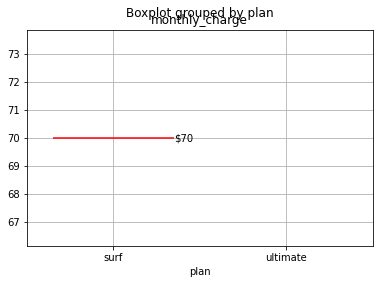

In [217]:
# box plot

user.boxplot(column = 'monthly_charge', by = 'plan', widths = 0.7);
plt.hlines(y=70, xmin=0.65, xmax=1.35, color='red')
plt.text(1.35, 70, '$70', ha='left', va='center');

Based on the box plots as a whole, we see that any Ultimate user who isn't giving a result of \\$70 is considered an outlier, and of those users they seem fairly evenly distributed, but uncommon. The Surf users are mostly below \\$70, but there are quite a few, clearly over a quarter, who are spending over $70 on a month, with some going well over even the highest prices that Ultimate users are providing.

Based on the analysis we did on the phone and text usage, we can determine that the overwhelming reason for this difference in profit is a result of internet use, which does not seem to have a significant difference based on the user. However, it is still useful for us to analyze all of our variables.

## Test statistical hypotheses

We will make a null hypothesis that Surf users on average result in revenue that is more than or equal to the revenue of Ultimate users. The reason to choose this as a null hypothesis is that it can provide a very clear and logical plan for an upcoming business model of encouraging upgrading to Ultimate. Conversely, if we find that Surf users result in less revenue, then the focus should be on ensuring that we retain as many Surf users as possible.

Firstly, we will perform an independent t-test. The reason we can perform an independent t-test is because the groups of "Surf users" and "Ultimate users" do not influence one another.

We will use a standard 0.05 significance level.

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

It is important that you clearly state your null hypothesis and your alternative hypothesis. What do you think just show that the means are the same without identifying which one is bigger? 
</div>

In [214]:
# test revenue difference

alpha = 0.05

test_one = st.ttest_ind(user[user['plan'] == 'surf']['monthly_charge'], 
                        user[user['plan'] == 'ultimate']['monthly_charge'], 
                        equal_var = False)

print('Mean revenue for Surf users:', user[user['plan'] == 'surf']['monthly_charge'].mean(), 
      '\nMean revenue for Ultimate users:', user[user['plan'] == 'ultimate']['monthly_charge'].mean(), '\n')

print("One-sided P-Value:", test_one.pvalue/2)
if test_one.pvalue < alpha and (user[user['plan'] == 'surf']['monthly_charge'].mean() 
                    > user[user['plan'] == 'ultimate']['monthly_charge'].mean()):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mean revenue for Surf users: nan 
Mean revenue for Ultimate users: nan 

One-sided P-Value: nan
We can't reject the null hypothesis


What this hypothesis test tells us is that while we do have an extremely low p-value, indicating that the true means of both groups are different (and, as we see in printing said means, our observed means have Surf users overall having a lower mean than Ultimate users) that we cannot reject the null hypothesis. Thus, the test indicates that the revenue gained from Surf users is not greater than the revenue gained through Ultimate users.

Even if some Surf users independently grant us extremely high revenue, as we could see in our box plot, most of the Surf users don't. Those outlier values are good for the company to have, but they aren't altering the overall Surf revenue to be significantly higher than Ultimate users.

It we did a two-tailed test, it is worth noting that we would reject the null hypothesis. That is to say, the p-value is so incredibly low that we can be certain that not only are the means different, we also can say for certain in this case that the Surf users have a lower result.

In brief: the guaranteed \\$70 Ultimate plan will, on average, earn the company more money than hoping for \\$20 Surf plan users going above their monthly limits. This can translate to a customer service policy. It would probably be for the best if we encouraged using the Ultimate plan. Most likely, someone using the Surf plan will not give our company greater revenue by going over their limits, and on a personal level they might get upset if they are blindsided by a bill as a result.

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

You must verify the interpretation of when we can reject the null hypothesis and when we cannot. 
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Once you have verified the above steps, you can retest to check the p-value. In addition, you must adjust the null hypothesis to get the correct interpretation. 
</div>

**Checking for difference in internet usage**

Earlier, we sort of assumed based on our eyeballing that the internet use was the same regardless on the type of plan. We should do a second hypothesis test to prove it, though.

In [215]:
# test internet usage difference

test_two = st.ttest_ind(user[user['plan'] == 'surf']['gb_used'],
                         user[user['plan'] == 'ultimate']['gb_used'],
                         equal_var = False)

print('Mean data for Surf users:', user[user['plan'] == 'surf']['gb_used'].mean(), 
      '\nMean data for Ultimate users:', user[user['plan'] == 'ultimate']['gb_used'].mean(), '\n')

print('P-value:', test_two.pvalue)

if (test_two.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mean data for Surf users: 16.983171521035597 
Mean data for Ultimate users: 17.784011220196355 

P-value: 0.02345218288236901
We reject the null hypothesis


Good thing we performed this test. It's just barely the case, but it does appear that there is a statistically significant difference in the mean internet data used between the two plans. If we used the other common alpha level of 0.01, we would have failed to reject, but it is wrong to change the alpha after performing analysis. This is just something that we are noting to point out that even as we reject our null hypothesis, the means are still rather similar.

We won't be able to tell users that many people already would spend an extra \\$50 on internet in the first place, so upgrading is not a big deal. Or, we could tell them that, but it would be a lie.

**NY-NJ Area**

Another question posed in the report is if the revenue we average from users in the NY-NJ area is different from the users in other regions.


In [216]:
# test the hypothesis

test_three = st.ttest_ind(user[user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_charge'], 
                        user[user['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_charge'], 
                        equal_var = False)

print('Mean revenue for NY-NJ area:', user[user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_charge'].mean(), 
      '\nMean revenue for other areas:', user[user['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_charge'].mean(), '\n')

print("P-Value:", test_three.pvalue)
if test_three.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mean revenue for NY-NJ area: nan 
Mean revenue for other areas: nan 

P-Value: nan
We can't reject the null hypothesis


<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

It is important that you clearly state your null hypothesis and your alternative hypothesis. 
</div>

Rejecting the null hypothesis here, coupled with a look at the mean of the area being lower than the mean for other areas, tells us that our revenue per user in the NY-NJ area is significantly lower than it is in other areas.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

For all hypothesis tests I recommend that you check whether the variances are equal or different. 
</div>

## General conclusion

To summarize the course of our analysis. First, we checked our data to ensure that everything was in order with no missing values or duplicated columns. We also added columns to the data set if they seemed to be areas we might need later. We aggregated the data from the 4 separate data sets of "Users", "Calls", "Messages" and "Internet" into a single data frame that showed the user's ID, plan, phone usage, text usage, and internet usage along with the prices associated with each of them, separated by month, and their city.

We used this data set to create visualizations of the data to analyze if there was a difference in user's activity based on their data plan. This would give us potential places that might cause a difference in revenue. However, we found that for the categories observed, there was not a significant difference in their activity.

Finally, we analyzed the two primary questions: What sort of impact a user's data plan has on our incoming revenue, and if the revenue for the NY-NJ area was different from that of other areas.

We concluded that on average, Surf users do not provide a greater revenue than Ultimate users, in part because in terms of the greatest variable to impact price - the internet usage - they have a lower mean, and so an overall more profitable option would be to increase focus on gaining more Ultimate users. A good place to potentially start would be in the NY-NJ area, since in there we observe that revenue appears to be underperforming compared to the rest of the nation.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Within the general conclusion you should consider adding the following points:

* You should add the steps to make the calculation of the payment of the users.
    
* With the adjustment to the comments you may change your finding on whether the revenue for the NY-NJ is different from other areas.
    
* You should add more arguments to the conclusions you are making based on the graphs, statistical tests and statistical data found. 
</div>